In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline

/opt/homebrew/Caskroom/miniforge/base/envs/gatsby3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
import umap
from torch_geometric.datasets import Planetoid

In [3]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
dataset = Planetoid(root='/tmp/Cora', name='Cora')
all_data = dataset[0].to(device)

In [5]:
all_data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [6]:
x = all_data.x.numpy().transpose()
x.shape

(1433, 2708)

In [7]:
umap_fit = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='euclidean')
umap_encoding = umap_fit.fit_transform(x)
umap_encoding.shape

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(1433, 2)

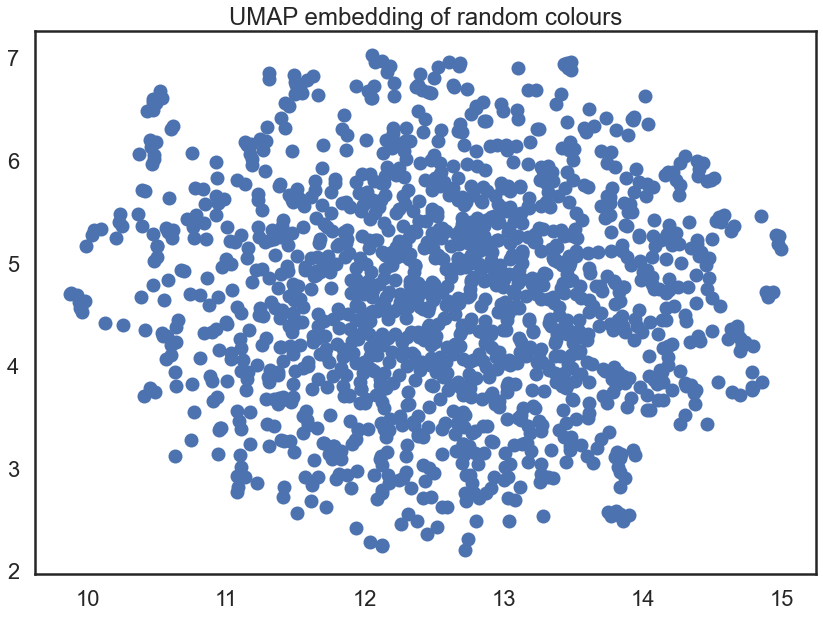

In [10]:
plt.scatter(umap_encoding[:,0], umap_encoding[:,1])
plt.title('UMAP embedding of random colours')
plt.show()

In [11]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(x);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)
    plt.show()

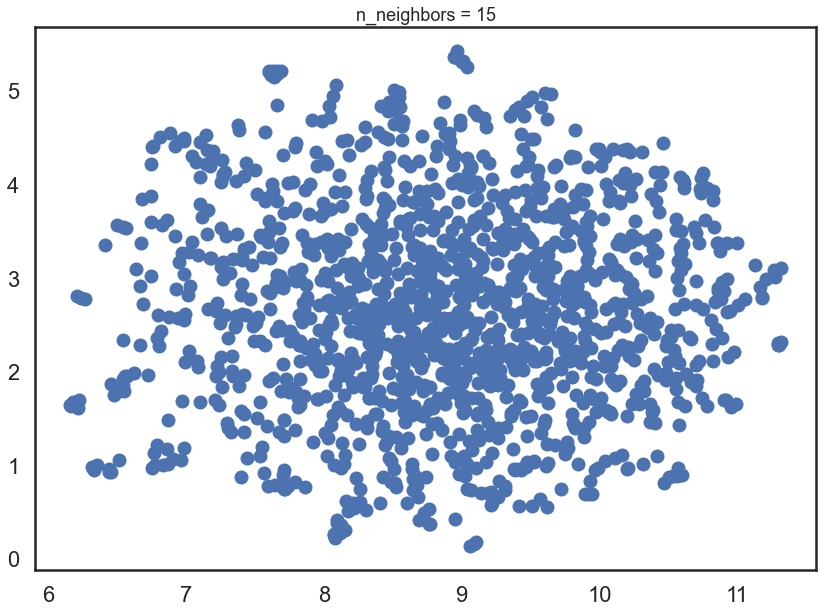

In [33]:
n = 15
draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

Testing min_distance

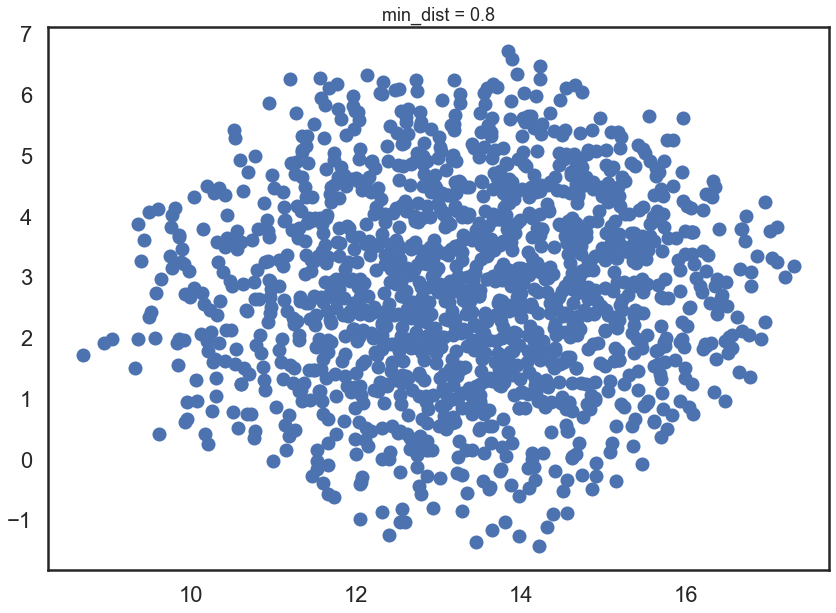

In [29]:
d = 0.8
draw_umap(min_dist=d, title='min_dist = {}'.format(d))

Testing n_components

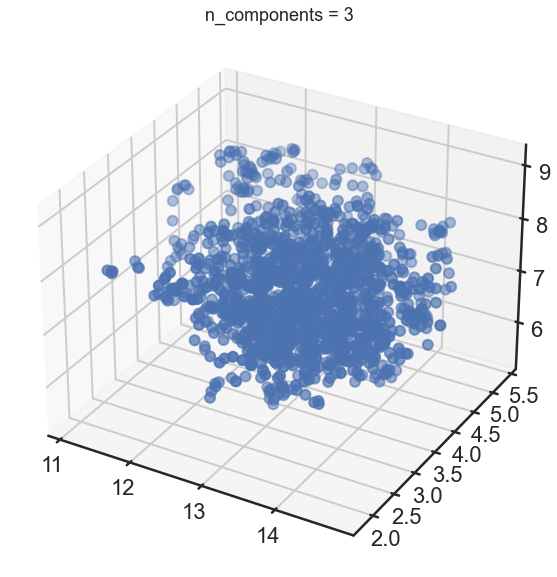

In [32]:
draw_umap(n_components=3, title='n_components = 3')